In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#====================================================
# Sparse linear regression
# y = Xw + noise, where w has only a few non-zeros
#====================================================
seed = 42
rng = np.random.default_rng(seed)

def make_sparse_regression(n = 400 , p = 80 , k = 8 , noise = 0.8 , seed = 42):
    rng = np.random.default_rng(seed)
    X = rng.normal(0 , 1 , size = (n , p))
    w_true = np.zeros(p)
    support = rng.choice(p , size = k , replace = False)
    w_true[support] = rng.normal(0 , 2.0 , size = k)
    y = X @ w_true + rng.normal(0 , noise , size = n)
    return X , y , w_true , support

X , y , w_true , support = make_sparse_regression(n = 400 , p = 80 , k = 8 , noise = 0.8 , seed = seed)

<Figure size 640x480 with 0 Axes>

<StemContainer object of 3 artists>

Text(0.5, 1.0, 'Week 3 Toy Setup: Sparse True Weights (only a few non-zero)')

Text(0.5, 0, 'Feature index')

Text(0, 0.5, 'Weight value')

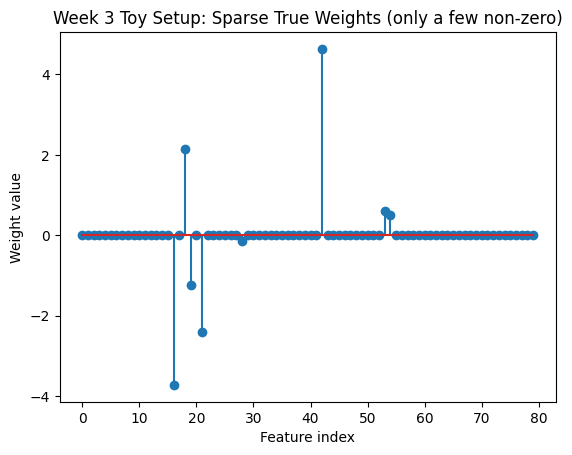

In [13]:
#====================================
# Plot 1: true coefficients (sparse)
#====================================
plt.figure()
plt.stem(w_true)
plt.title("Week 3 Toy Setup: Sparse True Weights (only a few non-zero)")
plt.xlabel("Feature index")
plt.ylabel("Weight value")
plt.show()

<Figure size 640x480 with 0 Axes>

<StemContainer object of 3 artists>

Text(0.5, 1.0, 'Baseline Fit (Least Squares): Estimated Weights (often dense)')

Text(0.5, 0, 'Feature index')

Text(0, 0.5, 'Estimated weight')

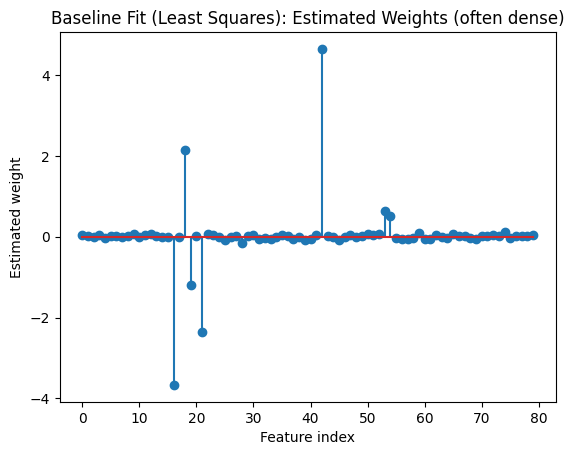

In [14]:
#==========================================================
# Baseline: closed-form least squares (no regularization)
#==========================================================
w_ls , *_ = np.linalg.lstsq(X , y , rcond = None)
mse_ls = np.mean((X @ w_ls - y) ** 2)

plt.figure()
plt.stem(w_ls)
plt.title("Baseline Fit (Least Squares): Estimated Weights (often dense)")
plt.xlabel("Feature index")
plt.ylabel("Estimated weight")
plt.show()

In [15]:
#======================================================
# Tiny optimization preview: Gradient Descent on MSE
#======================================================
def mse_and_grad(X , y , w):
    r = X @ w - y
    mse = np.mean(r ** 2)
    grad = (2 / X.shape[0]) * (X.T @ r)
    return mse , grad

def gradient_descent(X , y , lr = 0.05 , steps = 80):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(steps):
        loss , grad = mse_and_grad(X , y , w)
        losses.append(loss)
        w = w - lr * grad
    return w , np.array(losses)

w_gd , losses = gradient_descent(X , y , lr = 0.05 , steps = 80)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Gradient Descent Preview: MSE decreases over iterations')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'MSE')

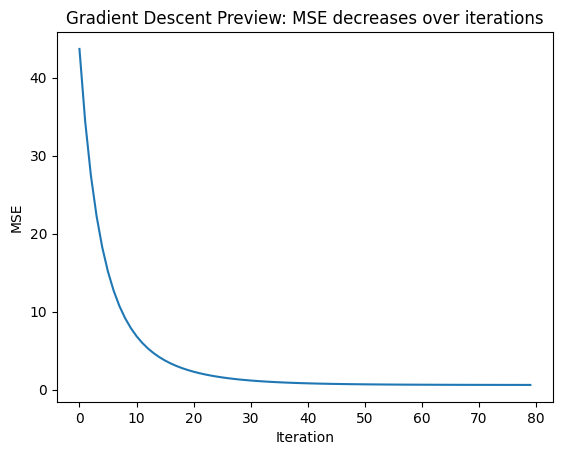

In [16]:
plt.figure()
plt.plot(losses)
plt.title("Gradient Descent Preview: MSE decreases over iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

In [17]:
print("Quick preview outputs: ")
print("Least Squares train MSE: " , round(mse_ls , 3))
print("GD (80 steps) train MSE: " , round(np.mean((X @ w_gd - y) ** 2) , 3))

Quick preview outputs: 
Least Squares train MSE:  0.609
GD (80 steps) train MSE:  0.615
